#  Hello, Tensorflow！

In [1]:
# -*- coding:utf-8 -*- 

In [2]:
import  tensorflow as tf

In [3]:
import os

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
hello = tf.constant("Hello, TF")

In [6]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
sess = tf.Session()

In [8]:
print(sess.run(hello))

b'Hello, TF'


In [9]:
sess.close()

In [10]:
a = tf.constant(5)
b = tf.constant(7)

In [11]:
c = a * b
d = a + b
e = a * d

# fetch feed

In [12]:
print(c)

Tensor("mul:0", shape=(), dtype=int32)


In [13]:
print(type(c))

<class 'tensorflow.python.framework.ops.Tensor'>


In [14]:
with tf.Session() as sess:
    print(sess.run([c,d,e] , feed_dict={a:6,b:8}))

[48, 14, 84]


# linear regression 

In [15]:
from __future__ import print_function, division

In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [17]:
# import data
train = pd.read_csv(r"bj_housing.csv")
train = train[train['Area'] < 300]
print(len(train))

9959


In [18]:
print(train.head())

   Area  Value  Room  Living  School  Year  Floor
0   128    370     3       1       1  2004     21
1    68    330     1       2       1  2000      6
2   125    355     3       2       0  2003      5
3   129    278     2       2       0  2005     16
4   118    340     3       2       0  2003      6


In [19]:
train_X = train['Area'].values.reshape(-1,1)
train_Y = train['Value'].values.reshape(-1,1)

In [20]:
n_samples = train_X.shape[0]
learning_rate = 2
# set learning rate
training_epochs = 100
# set display_step
display_step = 10

In [21]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(),name = "weight", dtype = tf.float32)
b = tf.Variable(np.random.randn(), name = "bias", dtype = tf.float32)

#pred = W * X + b
pred = tf.add(tf.multiply(W,X),b)

In [22]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

W0816 08:53:24.006231  4864 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict = {X: train_X, Y:train_Y})
        if (epoch)%display_step ==  0:
            c = sess.run(cost, feed_dict= {X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.3f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    print("--------------------------------------------------")
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y:train_Y})
    w_final = sess.run(W)
    b_final = sess.run(b)
    print("Training cost = ", training_cost , "W=", w_final, "b=",b_final,'\n')  

Epoch: 0001 cost= 57298.570 W= 0.59672296 b= 1.7082165
Epoch: 0011 cost= 10858.790 W= 3.4440975 b= 4.4886093
Epoch: 0021 cost= 11963.740 W= 4.1648912 b= 5.097207
Epoch: 0031 cost= 12222.546 W= 3.0914304 b= 3.8877995
Epoch: 0041 cost= 11639.621 W= 4.1000876 b= 4.7418146
Epoch: 0051 cost= 10843.972 W= 3.4563432 b= 3.9275792
Epoch: 0061 cost= 10649.476 W= 3.6263936 b= 3.914321
Epoch: 0071 cost= 10691.487 W= 3.7562454 b= 3.8504364
Epoch: 0081 cost= 10646.861 W= 3.6383057 b= 3.5305533
Epoch: 0091 cost= 10649.156 W= 3.631153 b= 3.3152542
Optimization Finished!
--------------------------------------------------
Training cost =  10645.361 W= 3.6818733 b= 3.1747944 



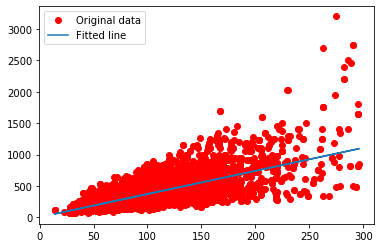

In [26]:
import matplotlib.pyplot as plt
# show the plot 
plt.plot(train_X, train_Y, 'ro', label="Original data") 
plt.plot(train_X, w_final * train_X + b_final, label="Fitted line") 
plt.legend()
plt.show() 